In [6]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# metrics
from sklearn.metrics import accuracy_score, log_loss

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# global variables
dataset_file_path = 'data/processed.cleveland.data'

def load_data(filename):
    '''
    Reads specified .csv file and returns an X and y dataframe.
    > 0. age
    > 1. sex
    > 2. chest pain type(4 values)
    > 3. resting blood pressure
    > 4. serum cholestoral in mg/dl
    > 5. fasting blood sugar > 120 mg/dl
    > 6. resting electrocardiographic results(values 0, 1, 2)
    > 7. maximum heart rate achieved
    > 8. exercise induced angina
    > 9. oldpeak = ST depression induced by exercise relative to rest
    > 10. the slope of the peak exercise ST segment
    > 11. number of major vessels(0-3) colored by flourosopy
    > 12. thal: 3 = normal, 6 = fixed defect, 7 = reversable defect
    > 13. num: 0 = no presence, 4 = present
    '''

    # reading the data
    try:
        print("Reading .csv")
        data = pd.read_csv(filename, header=None)
        print("Finished reading .csv")
    except:
        print("Unable to read .csv")

    # set column names
    attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    data.columns = attributes

    X, y = data.iloc[:, 0:-1], data.iloc[:, -1]

    return X, y

def preprocess_data(data):
    '''
    Arguments: Pandas Dataframe (X_train or X_test)
    Return: Preprocessed np array
    '''
    # saving columns and indices since ColumnTransformer removes them
    columns = data.columns
    index = data.index

    # defining categorical and numerical features (and categorical feature value range)
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 
                             'exang', 'slope', 'ca', 'thal']
    categories = [[0,1], [1,2,4], [0,1], [0,1,2], 
                  [0,1], [1,2,3], [0,1,2,3], [3,6,7]]
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    # creating transformers
    # categorical_transformer = Pipeline[('onehot', OneHotEncoder())]
    # numerical_transformer = Pipeline[('scaler', StandardScaler())]

    # creating and applying ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[('num', StandardScaler(), numerical_features),
                      ('cat', OneHotEncoder(categories=categories, 
                                            handle_unknown='ignore'),
                       categorical_features)],
        n_jobs=-1)

    data = preprocessor.fit_transform(data)
    
    return data

In [7]:
data = pd.read_csv('data/processed.cleveland.data', header=None)
attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data.columns = attributes
X, y = data.iloc[:, :-1], data.iloc[:, -1]

[0.10351118 0.02946029 0.05566025 0.08548449 0.10283017 0.02781476
 0.03769335 0.09692361 0.0714662  0.11560113 0.05765422 0.10876108
 0.10713927]


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


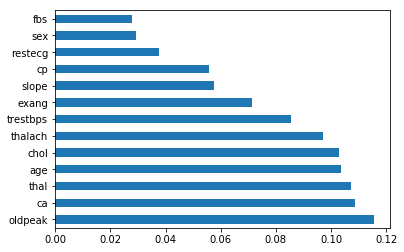

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).plot(kind='barh')
plt.show()